#Extração dos Dados

In [ ]:
import numpy as np

In [ ]:
# Importando os Dados
# Os dados foram importados para o git-hub para facilitar o acesso
path_cali = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/artificial1d.csv'
df = np.genfromtxt(path_cali, delimiter = ',')
df

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

In [ ]:
ones  = np.ones((len(df),1))
ones.shape

(30, 1)

In [ ]:
X0 = df[:,[0]]
Y = df[:,[1]]
[X0.shape, Y.shape]

[(30, 1), (30, 1)]

In [ ]:
X = np.c_[ones,X0]
X.shape

(30, 2)

# *OLS*

Precisamos Resolver o seguinte sistema: $$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot Y $$ 

No entanto, podemos fazer a seguinte transformação para evitar o uso de Matr. Inversa:
$$ B \cdot W = X^T \cdot Y $$ 

Desse modo, utilizamos o solver para a solução do sistema linear:

In [ ]:
def solve_W(vec_X,Vec_Y):
    X = vec_X
    B = X.T @ X
    W_solve = np.linalg.solve(B,X.T@Vec_Y)
    return W_solve

adj = solve_W(X,Y)
adj

array([[0.06761792],
       [1.57486517]])

In [ ]:
Y_adj = adj[0] + adj[1]*X0

In [ ]:

def erro(vec_y,vec_y_adj):
  Y = vec_y
  Y_adj = vec_y_adj 
  MSE = ( ((Y - Y_adj).T) @ (Y-Y_adj) )/len(Y)
  RMSE = np.sqrt(MSE)
  return np.c_[MSE,RMSE]
erro(Y,Y_adj)

array([[0.2134009 , 0.46195335]])

Plotando a Imagem

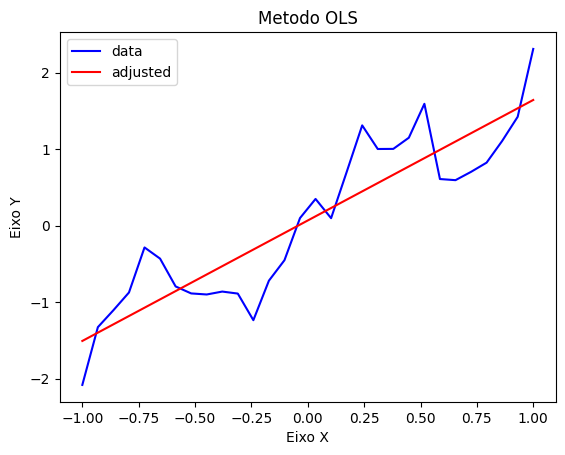

In [ ]:
import matplotlib.pyplot as plt

# dados para plotar
x = X0
y = Y
y_adj = Y_adj

# cria o objeto de figura e eixos
fig, ax = plt.subplots()

# adiciona o gráfico de linha
ax.plot(x, y, label= 'data', color = 'b')
ax.plot(x,y_adj,label='adjusted', color = 'r')

# adiciona o título e rótulos dos eixos
ax.set_title('Metodo OLS')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# mostra o gráfico
plt.legend()
plt.show()

# *GD*

In [ ]:
w0 = []
w1 = []
w = [0.5, 0.5]
a = 0.3
erros = []
epoch = 200
for j in range(epoch):
  yi = []
  ei = []
  eix= []
  for i in range( len(X0) ):
    yi.append( w[0] + w[1]*X0[i] )
    ei.append(y[i] - yi[i])
    eix.append( (y[i] - yi[i])*X0[i] )
  N = len(ei)
  w0.append( w[0] +  (a/N)*sum(ei))
  w1.append( w[1] +  (a/N)*sum(eix))
  erros.append( erro(Y,yi) )
  w[0] = w0[j]
  w[1] = w1[j]
w = np.array(w)
erros = np.array(erros)

In [ ]:
# Parâmetros 
w

array([[0.06761792],
       [1.57486517]])

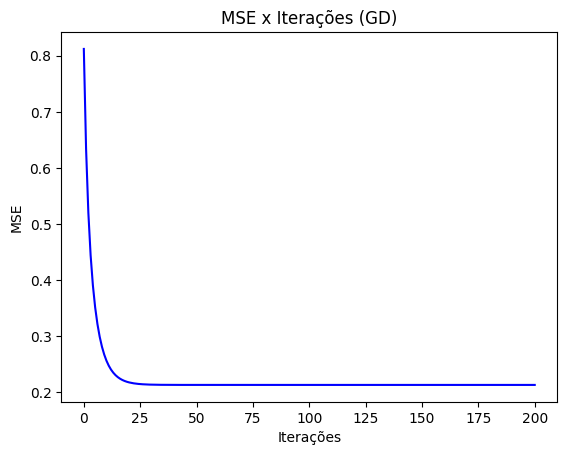

In [ ]:
# dados para plotar
eixo_x = np.linspace(0,epoch,epoch)
eixo_y = erros[:,0,0]

# cria o objeto de figura e eixos
fig, ax = plt.subplots()

# adiciona o gráfico de linha
ax.plot(eixo_x, eixo_y,color = 'b')

# adiciona o título e rótulos dos eixos
ax.set_title('MSE x Iterações (GD)')
ax.set_xlabel('Iterações')
ax.set_ylabel('MSE')

# mostra o gráfico
plt.show()

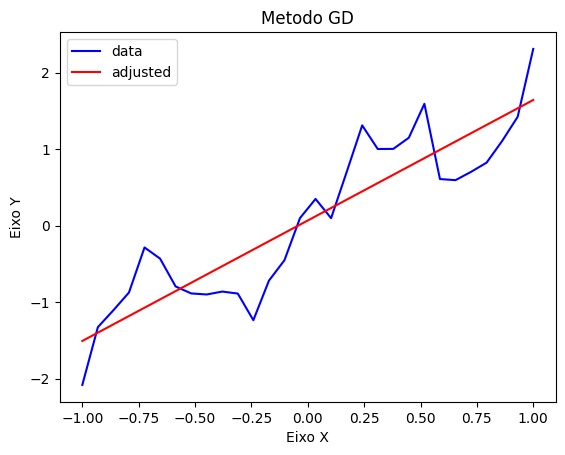

In [ ]:
import matplotlib.pyplot as plt

# dados para plotar
x = X0
y = Y
y_adj = w[0] + w[1]*X0

# cria o objeto de figura e eixos
fig, ax = plt.subplots()

# adiciona o gráfico de linha
ax.plot(x, y, label= 'data', color = 'b')
ax.plot(x,y_adj,label='adjusted', color = 'r')

# adiciona o título e rótulos dos eixos
ax.set_title('Metodo GD')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# mostra o gráfico
plt.legend()
plt.show()

# *SGD*

In [ ]:

import random
# Define a taxa de aprendizado e número de épocas
lr = 0.001
epochs = 200

# Inicializa os pesos aleatoriamente
w = np.random.rand(X.shape[1], 1)

MSE = []
# Loop de treinamento
for i in range(epochs):
    # Loop sobre cada amostra de treinamento
    for j in range(X.shape[0]):
        # Seleciona uma amostra aleatória
        idx = np.random.randint(X.shape[0])
        xj = X[idx:idx+1, :]
        yj = y[idx:idx+1, :]
        
        # Calcula o erro e o gradiente para a amostra selecionada
        error = yj - xj.dot(w)
        grad = -2 * xj.T.dot(error)
        
        # Atualiza os pesos usando o gradiente descendente estocástico
        w -= lr * grad
    MSE.append(error**2)

MSE = np.array(MSE)
# Imprime os pesos aprendidos
print(w)

[[0.05457462]
 [1.54299882]]


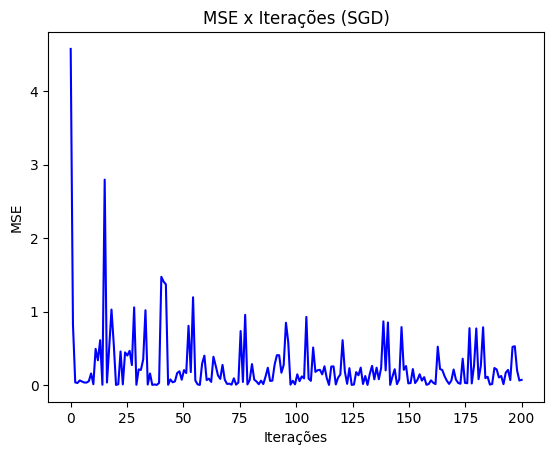

In [ ]:
# dados para plotar
eixo_x = np.linspace(0,MSE.shape[0],MSE.shape[0])
eixo_y = MSE.T[0,0,:]

# cria o objeto de figura e eixos
fig, ax = plt.subplots()

# adiciona o gráfico de linha
ax.plot(eixo_x, eixo_y,color = 'b')

# adiciona o título e rótulos dos eixos
ax.set_title('MSE x Iterações (SGD)')
ax.set_xlabel('Iterações')
ax.set_ylabel('MSE')

# mostra o gráfico
plt.show()

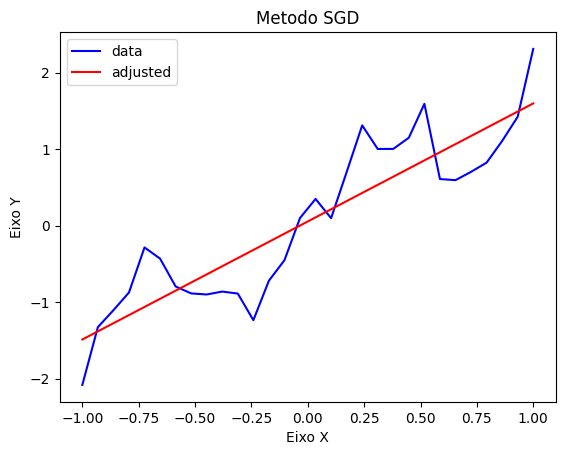

In [ ]:
# dados para plotar
x = X0
y = Y
y_adj = w[0] + w[1]*X0

# cria o objeto de figura e eixos
fig, ax = plt.subplots()

# adiciona o gráfico de linha
ax.plot(x, y, label= 'data', color = 'b')
ax.plot(x,y_adj,label='adjusted', color = 'r')

# adiciona o título e rótulos dos eixos
ax.set_title('Metodo SGD')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# mostra o gráfico
plt.legend()
plt.show()

# EXTRAÇÃO DOS DADOS 2

In [ ]:
# Importando os Dados
# Os dados foram importados para o git-hub para facilitar o acesso
path_cali = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/california.csv'
df = np.genfromtxt(path_cali, delimiter = ',')
df.shape

(1000, 9)

In [372]:
X = df[:,:8]
X.shape

(1000, 8)

In [375]:
y = df[:,[8]]
y.shape

(1000, 1)

In [377]:

# Define ordens de polinômio para testar
poly_orders = range(1, 14)

# Divide os dados em conjunto de treino e teste
split_ratio = 0.8
split_idx = int(split_ratio * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Normaliza os dados de entrada
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# Loop para testar diferentes ordens de polinômio
rmse_values = []
for poly_order in poly_orders:
    # Cria matriz de design com as features polinomiais
    X_poly_train = np.ones((X_train.shape[0], 1))
    X_poly_test = np.ones((X_test.shape[0], 1))
    for i in range(poly_order):
        X_poly_train = np.hstack((X_poly_train, X_train**(i+1)))
        X_poly_test = np.hstack((X_poly_test, X_test**(i+1)))

    # Inicializa os pesos aleatoriamente
    theta = np.random.rand(X_poly_train.shape[1], 1)

    # Define a taxa de aprendizado e número de épocas
    lr = 0.01
    epochs = 1000

    # Loop de treinamento
    for i in range(epochs):
        # Calcula o erro e o gradiente para todo o conjunto de treino
        error = y_train - X_poly_train.dot(theta)
        grad = -2 * X_poly_train.T.dot(error)

        # Atualiza os pesos usando o gradiente descendente
        theta -= lr * grad

    # Calcula o erro quadrático médio (RMSE) no conjunto de teste
    y_pred = X_poly_test.dot(theta)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    rmse_values.append(rmse)

<ipython-input-377-f0caed49442e>:38: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad
<ipython-input-377-f0caed49442e>:35: RuntimeWarning: overflow encountered in multiply
  grad = -2 * X_poly_train.T.dot(error)
